This project is based around data analysis and modeling.”. The data I will be using is “Palmer Archipelago Penguin data”. My proposed analysis is if i can predict the island and or species the penguin is from the data.

In [115]:
try:
    from google.colab import drive
    import sys
    drive.mount('/content/drive')
    notes_home = "/content/drive/My Drive/homework/Final/"
    user_home = "/content/drive/My Drive/"

    sys.path.insert(1,notes_home) # let the notebook access the notes folder

except ModuleNotFoundError:
    notes_home = "" # running native Jupyter environment -- notes home is the same as the notebook
    user_home = ""  # under Jupyter we assume the user directory is the same as the notebook

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
import os
os.chdir("/content/drive/My Drive/homework/Final/")

In [117]:
os.getcwd()

'/content/drive/My Drive/homework/Final'

In [118]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

**DATA**

The data consists of the penguins Sample number, species, region, island, stage (of growth), Individual ID, Clutch Completion (if they have eggs), Egg Date, Culmen Length, Culmen Depth, Flipper Length, Body Mass, Sex, and Delta 15N (nitrogen waste), Delta 13C (Methane).
A lot of these labels might not be necessary for my goal and might need to be purged but as we can see there is a great amount of data collected that can be used in various models for several target label conclusions


In [119]:
df = pd.read_csv(notes_home+"penguins_lter.csv")
df
#344 rows × 17 columns

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


array([[<Axes: title={'center': 'Sample Number'}>,
        <Axes: title={'center': 'Culmen Length (mm)'}>,
        <Axes: title={'center': 'Culmen Depth (mm)'}>],
       [<Axes: title={'center': 'Flipper Length (mm)'}>,
        <Axes: title={'center': 'Body Mass (g)'}>,
        <Axes: title={'center': 'Delta 15 N (o/oo)'}>],
       [<Axes: title={'center': 'Delta 13 C (o/oo)'}>, <Axes: >,
        <Axes: >]], dtype=object)

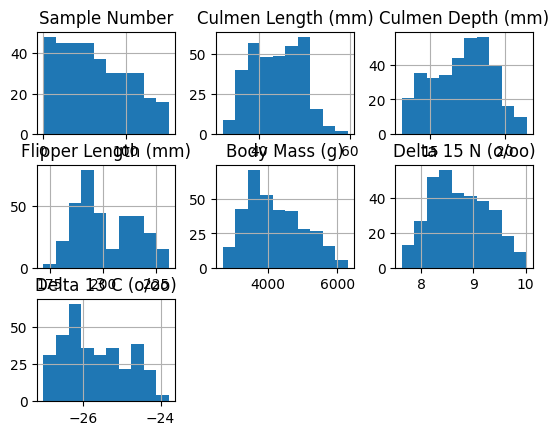

In [120]:
df.hist()

<Axes: >

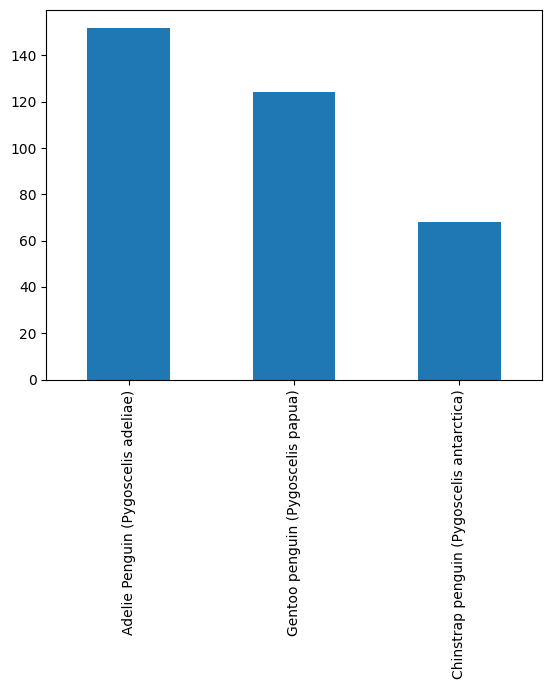

In [121]:
df['Species'].value_counts().plot(kind='bar')

<Axes: >

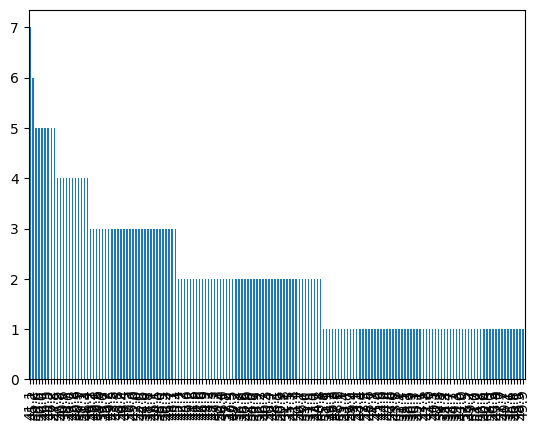

In [122]:
df['Culmen Length (mm)'].value_counts().plot(kind='bar')

<Axes: >

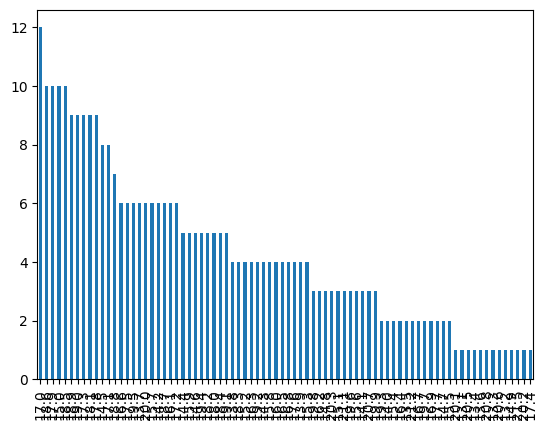

In [123]:
df['Culmen Depth (mm)'].value_counts().plot(kind='bar')

<Axes: >

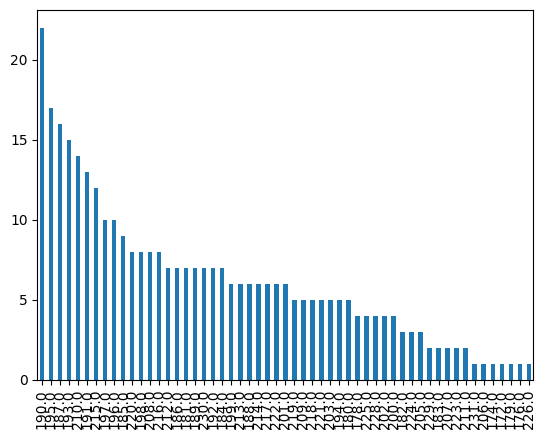

In [124]:
df['Flipper Length (mm)'].value_counts().plot(kind='bar')

<Axes: >

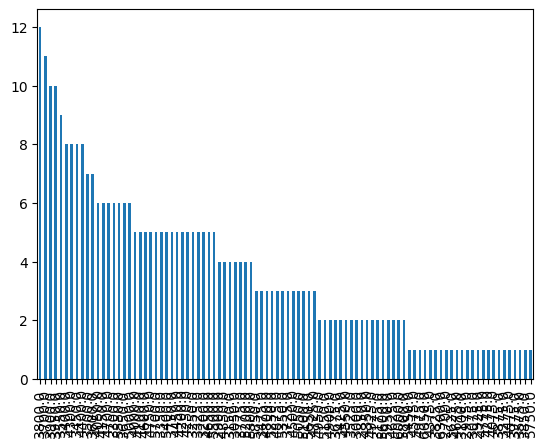

In [125]:
df['Body Mass (g)'].value_counts().plot(kind='bar')

In [126]:
df.mode()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0910,1.0,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N13A1,Yes,11/27/07,41.1,17.0,190.0,3800.0,MALE,7.63220,-27.01854,Nest never observed with full clutch.
1,NaN,2.0,NaN,NaN,NaN,NaN,N13A2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.63452,-26.95470,NaN
2,NaN,3.0,NaN,NaN,NaN,NaN,N18A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.63884,-26.89644,NaN
3,NaN,4.0,NaN,NaN,NaN,NaN,N18A2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.68528,-26.86485,NaN
4,NaN,5.0,NaN,NaN,NaN,NaN,N21A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.68870,-26.86352,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.98044,-24.16566,NaN
327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.02019,-24.10255,NaN
328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.02372,-23.90309,NaN
329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.02544,-23.89017,NaN


In [127]:
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [128]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

 The graphs show a good array of information in terms of variation of data in terms of “culmen depth”, “flipper length”, “body mass” with varying sizes as length, also chemical makeup of excrement. I intend to remove most of the other corresponding data as I don’t think it is relevant to what I need for my algorithm, but I will have to meddle around with it to ultimately see.

**TESTING**

For our methods I used a simple decision tree for predicting the island. As for the species prediction I ended up using many models using perceptron’s in a whole wide array of types from including 5-fold, cross validation, grid search, optimal classifiers, as well as using the KNN model (including training, testing and grid search), I also included MLP model using varying activation types. Lastly, I implemented the SVM model with varying degrees of parameters.

**Basic Decision Tree**

In [129]:
if 'google.colab' in sys.modules:
  !pip install -q dtreeviz
  !pip install --upgrade pandas
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
from sklearn.metrics import accuracy_score

In [130]:
#decision tree - dtreevis
#remove problem columns, and rows
df.dropna(axis=1)
df.drop([3,339], 0,  inplace=True)
df.drop('studyName', axis=1, inplace=True)
df.drop('Region', axis=1, inplace=True)
df.drop('Stage', axis=1, inplace=True)
df.drop('Individual ID', axis=1, inplace=True)
df.drop('Date Egg', axis=1, inplace=True)
df.drop('Comments', axis=1, inplace=True)
df.drop('Sex', axis=1, inplace=True)
df.drop('Delta 15 N (o/oo)', axis=1, inplace=True)
df.drop('Delta 13 C (o/oo)', axis=1, inplace=True)
#build x and y values
features_df = df.drop(['Island'],axis=1)
target_df = pd.DataFrame(df['Island']) # y_Train
target_df['Island'].replace(["Torgersen","Biscoe","Dream"], [1,2,3], inplace=True)
target_df= target_df.to_numpy()
target_df= target_df.flatten()
features_df['Clutch Completion'].replace(["Yes","No"], [1,2], inplace=True)
features_df['Species'].replace(["Adelie Penguin (Pygoscelis adeliae)","Chinstrap penguin (Pygoscelis antarctica)","Gentoo penguin (Pygoscelis papua)"], [1,2,3], inplace=True)
target_df= target_df.flatten()
features_df.columns

<ipython-input-130-d863961bf6b2>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


Index(['Sample Number', 'Species', 'Clutch Completion', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)'],
      dtype='object')

In [131]:
dtree = tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(features_df,target_df)

DecisionTreeClassifier(criterion='entropy')

In [139]:

viz = dtreeviz(dtree,
               features_df,
               target_df,
               target_name='Island',
               feature_names= features_df.columns,
               class_names= ["Clutch Completion", "Culmen Length (mm)", "Culmen Depth (mm)","Flipper Length (mm)","Body Mass (g)"]
              )

<ipython-input-139-05d1394feab7>:1: DeprecationWarning: dtreeviz() function is deprecated starting from version 2.0. 
 For the same functionality, please use this code instead: 
 m = dtreeviz.model(...) 
 m.view()


TypeError: ignored

In [140]:
predicted_labels2 = dtree.predict(features_df)  #predicts a label for the features
#Test for accuracy
print("Our model accuracy is: {}".format(accuracy_score(target_df, predicted_labels2
                                                        )))

#model has 100% accuracy rating

Our model accuracy is: 1.0


As we can see, we achieved an easy 1.0 accuracy for predicting the island in which a penguin is from, but this was kinda too easy so lets aim for species instead now.

In [141]:
"""
treeviz.py
A simple tree visualizer for sklearn DecisionTreeClassifiers.
Written by Lutz Hamel, (c) 2017 - Univeristy of Rhode Island
"""
import operator

def tree_print(clf, X):
    """
    Print the tree of a sklearn DecisionTreeClassifier
    Parameters
    ----------
    clf : DecisionTreeClassifier - A tree that has already been fit.
    X : The original training set
    """
    tlevel = _tree_rprint('', clf, X.columns, clf.classes_)
    print('<',end='')
    for i in range(3*tlevel - 2):
        print('-',end='')
    print('>')
    print('Tree Depth: ',tlevel)

def _tree_rprint(kword, clf, features, labels, node_index=0, tlevel_index=0):
    # Note: The DecisionTreeClassifier uses the Tree structure defined in:
    # 		github.com/scikit-learn/scikit-learn/blob/master/sklearn/tree/_tree.pyx
    #       it is an array based tree implementation:

    # indent the nodes according to their tree level
    for i in range(tlevel_index):
        print('  |',end='')

	#  TODO: the following should use the TREE_LEAF constant defined in _tree.pyx
	#        instead of -1, not quite sure how to get at it from the tree user level
    if clf.tree_.children_left[node_index] == -1:  # indicates leaf
        print(kword, end=' ' if kword else '')
        # get the majority label
        count_list = clf.tree_.value[node_index, 0]
        #lhh
        #print("count list: {}".format(count_list))
        if len(count_list) == 1:
            # regression problem
            print(count_list[0])
        else:
            # get the majority label
            max_index, max_value = max(enumerate(count_list), key=operator.itemgetter(1))
            max_label = labels[max_index]
            print(max_label)
        return tlevel_index

    else:
        # compute and print node label
        feature = features[clf.tree_.feature[node_index]]
        threshold = clf.tree_.threshold[node_index]
        print(kword, end=' ' if kword else '')
        print('if {} =< {}: '.format(feature, threshold))
        # recurse down the children
        left_index = clf.tree_.children_left[node_index]
        right_index = clf.tree_.children_right[node_index]
        ltlevel_index = _tree_rprint('then', clf, features, labels, left_index, tlevel_index+1)
        rtlevel_index = _tree_rprint('else', clf, features, labels, right_index, tlevel_index+1)
        # return the maximum depth of either one of the children
        return max(ltlevel_index,rtlevel_index)

**Perceptron Model**

In [142]:
#perceptron model
import pandas as pd3
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [143]:
df2 = pd.read_csv(notes_home+"penguins_lter.csv")
df2.drop([3,339], 0,  inplace=True)

<ipython-input-143-74faa086fc00>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


In [144]:
# prepare our data - just grab the two independent variables from the Penguin dataset that mattered
# in addition to the target.
shrink_df = df2[['Culmen Length (mm)','Flipper Length (mm)','Species']]

model_df = shrink_df[shrink_df.Species != 'Chinstrap penguin (Pygoscelis antarctica)']

# feature matrix and target vector
model_features_df = model_df[['Culmen Length (mm)','Flipper Length (mm)']]
# neural networks can only deal with numerical target values,
# recode the labels as numerical values
f = (lambda x: 1 if x == 'Adelie Penguin (Pygoscelis adeliae)' else -1)
model_target_df = model_df['Species'].apply(f)
model_target_df

0      1
1      1
2      1
4      1
5      1
      ..
338   -1
340   -1
341   -1
342   -1
343   -1
Name: Species, Length: 274, dtype: int64

In [145]:
# build and fit the perceptron model
from sklearn.linear_model import Perceptron
model = Perceptron()
model.fit(model_features_df, model_target_df)

# model accuracy
predict_array = model.predict(model_features_df)      # produces an array of labels
predicted_values = pd.DataFrame(predict_array)  # turn it into a DF
predicted_values.columns = ['Species']          # name the column - same name as in target!
print("Our model accuracy is: {:3.2f}".format(accuracy_score(model_target_df, predicted_values)))
#Perceptron model predicts 56% accuracy on finding the species of penguin from Culmen Length and Flipper Length

Our model accuracy is: 0.56


In [146]:
#Model Evaluation: Cross-Validation, Confusion Matrices, and Confidence Intervals

In [147]:
###### Set Up #####
# verify our folder with the data and module assets is installed
# if it is installed make sure it is the latest
!test -e ds-assets && cd ds-assets && git pull && cd ..
# if it is not installed clone it
!test ! -e ds-assets && git clone https://github.com/IndraniMandal/ds-assets.git
# point to the folder with the assets
home = "ds-assets/assets/"
import sys
sys.path.append(home)

remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 34 (delta 16), reused 25 (delta 12), pack-reused 0
Unpacking objects: 100% (34/34), 5.19 MiB | 3.60 MiB/s, done.
From https://github.com/IndraniMandal/ds-assets
   678cb33..1300cde  main       -> origin/main
Updating 678cb33..1300cde
Fast-forward
 assets/Pancreatic Cancer 2020.csv                  |    591 +
 assets/candy-data.csv                              |     86 +
 assets/diamonds.csv                                |  53941 +++++
 assets/gapminder_all.csv                           |    143 +
 assets/gapminder_gdp_africa.csv                    |     53 +
 assets/gapminder_gdp_americas.csv                  |     26 +
 assets/gapminder_gdp_asia.csv                      |     34 +
 assets/gapminder_gdp_europe.csv                    |     31 +
 assets/gapminder_gdp_oceania.csv                   |      3 +
 ...covid19_southamerica - covid19

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
#from treeviz import tree_print
# sklearn provides manipulation of training sets
# here we do train/test split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
df3 = pd.read_csv(notes_home+"penguins_lter.csv")
df3.dropna(axis=1)
df3.drop([3,339], 0,  inplace=True)
df3.drop('studyName', axis=1, inplace=True)
df3.drop('Region', axis=1, inplace=True)
df3.drop('Stage', axis=1, inplace=True)
df3.drop('Individual ID', axis=1, inplace=True)
df3.drop('Date Egg', axis=1, inplace=True)
df3.drop('Comments', axis=1, inplace=True)
df3.drop('Sex', axis=1, inplace=True)
df3.drop('Delta 15 N (o/oo)', axis=1, inplace=True)
df3.drop('Delta 13 C (o/oo)', axis=1, inplace=True)
df3['Island'].replace(["Torgersen","Biscoe","Dream"], [1,2,3], inplace=True)
df3['Species'].replace(["Adelie Penguin (Pygoscelis adeliae)","Chinstrap penguin (Pygoscelis antarctica)","Gentoo penguin (Pygoscelis papua)"], [1,2,3], inplace=True)
df3['Clutch Completion'].replace(["Yes","No"], [1,2], inplace=True)

In [ ]:
X  = df3.drop(['Species'],axis=1)
y = df3['Species']
datasets = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=2)
(X_train, X_test, y_train, y_test) = datasets
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)
model.fit(X_train, y_train)
# Train results: evaluate the model on the testing set of data
y_train_model = model.predict(X_train)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing set of data
y_test_model = model.predict(X_test)
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, y_test_model)))

In [ ]:
#medium complexity tree
# set up the tree model object
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

# fit the model on the training set of data
model.fit(X_train, y_train)
tree_print(model,X)

# Train results: evaluate the model on the testing set of data
y_train_model = model.predict(X_train)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing set of data
y_test_model = model.predict(X_test)
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, y_test_model)))

#Train Accuracy: 0.99
#Test Accuracy: 0.94
#depth 3

In [ ]:
#high complexity tree
# set up the tree model object
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=None)

# fit the model on the training set of data
model.fit(X_train, y_train)
tree_print(model,X)

# Train results: evaluate the model on the testing set of data
y_train_model = model.predict(X_train)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing set of data
y_test_model = model.predict(X_test)
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, y_test_model)))

#Tree Depth:  4
#Train Accuracy: 1.00
#Test Accuracy: 0.96

In [ ]:
#cross validation
import pandas as pd
import numpy as np
np.set_printoptions(formatter={'float_kind':"{:3.2f}".format})
from sklearn import tree
# grab cross validation code
from sklearn.model_selection import cross_val_score

In [ ]:
# set up the model
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)

# do the 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5)
print("Fold Accuracies: {}".format(scores))
print("Accuracy: {:3.2f}".format(scores.mean()))

#Fold Accuracies: [0.97 0.94 0.94 0.93 0.96]
#Accuracy: 0.95

In [ ]:
# Grid search with cross-validation for penguin dataset
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# setting up grid search
model = model = tree.DecisionTreeClassifier(random_state=1)
param_grid = {
    'max_depth': list(range(1,11)), # search 1..10
    'criterion': ['entropy', 'gini']
    }
grid = GridSearchCV(model, param_grid, cv=5)

# performing grid search
grid.fit(X,y)

# print out best parameters
print("Best parameters: {}".format(grid.best_params_))

# print out the best model
print("Best tree:")
tree_print(grid.best_estimator_,X)

# compute the accuracy of optimal classifier
predict_y = grid.best_estimator_.predict(X)
acc = accuracy_score(y, predict_y)

# print accuracy
print("Accuracy of optimal classifier: {:3.2f}".format(acc))

#Tree Depth:  2
#Accuracy of optimal classifier: 0.96

As we can see the Perceptron model performs best when tailored too, the low complexity model was okay but compared to the medium/high and grid search it performed poorly.

Where as the grid search method developed its own model and decided a tree depth of only two was necessary under the gini activation parameter.

**KNN MODEL**

In [ ]:
#KNN
import pandas as pd
import sys
import numpy as np
np.set_printoptions(formatter={'float_kind':"{:3.2f}".format})
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from confint import classification_confint

In [ ]:
# set up the model with k=3
model = KNeighborsClassifier(n_neighbors=3)

# do train and test
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2)
model.fit(train_X, train_y)
predict_y = model.predict(test_X)
acc = accuracy_score(test_y, predict_y)
lb, ub = classification_confint(acc, test_X.shape[0])
print("Accuracy: {:3.2f} ({:3.2f}, {:3.2f})".format(acc, lb, ub))

#Accuracy: 0.72 (0.62, 0.83)

In [ ]:
# KNN grid search
model = KNeighborsClassifier()
X  = df3.drop(['Species'],axis=1)
y = df3['Species']
# grid search
param_grid = {'n_neighbors': list(range(1,26))}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X,y)
print("Grid Search: best parameters: {}".format(grid.best_params_))

# accuracy of best model with confidence interval
best_model = grid.best_estimator_
predict_y = best_model.predict(X)
acc = accuracy_score(y, predict_y)
lb,ub = classification_confint(acc,X.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

# build the confusion matrix
labels = ['Adelle', 'Gentoo']
#cm = confusion_matrix(y, predict_y, labels=labels)
#cm_df = pd.DataFrame(cm, index=labels, columns=labels)
#print("Confusion Matrix:\n{}".format(cm_df))

#82% accuracy of predicting between gentoo and adelle penguins giving bio measuresments.

The KNN model performed well, nearest neighbor was targeted at 6, and i achieved a 82% accuracy rating, sadly i had to drop the chisntrap species to make this work.

**MLP MODEL**

In [ ]:
###### Set Up #####
# verify our folder with the data and module assets is installed
# if it is installed make sure it is the latest
!test -e ds-assets && cd ds-assets && git pull && cd ..
# if it is not installed clone it
!test ! -e ds-assets && git clone https://github.com/lutzhamel/ds-assets.git
# point to the folder with the assets
home = "ds-assets/assets/"
import sys
sys.path.append(home)      # add home folder to module search path
# set up
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from confint import classification_confint
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
np.set_printoptions(formatter={'float_kind':"{:3.2f}".format})
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [ ]:
print("Shape: {}".format(X.shape))

In [ ]:
# one layer using relu
model = MLPClassifier(hidden_layer_sizes=(38,), activation = 'relu', max_iter=10000, random_state=1)

# train and test the model
model.fit(X, y)
predict_y = model.predict(X)
acc = accuracy_score(y, predict_y)
lb, ub = classification_confint(acc, X.shape[0])
print("Accuracy: {:3.2f} ({:3.2f}, {:3.2f})".format(acc, lb, ub))

In [ ]:
# two layer using logistic
model = MLPClassifier(hidden_layer_sizes=(30,45,), activation='logistic', max_iter=10000, random_state=1)

# train and test the model
model.fit(X, y)
predict_y = model.predict(X)
acc = accuracy_score(y, predict_y)
lb, ub = classification_confint(acc, X.shape[0])
print("Accuracy: {:3.2f} ({:3.2f}, {:3.2f})".format(acc, lb, ub))

In [ ]:
# two layer using relu
model = MLPClassifier(hidden_layer_sizes=(30,45,), activation='relu', max_iter=10000, random_state=1)

# train and test the model
model.fit(X, y)
predict_y = model.predict(X)
acc = accuracy_score(y, predict_y)
lb, ub = classification_confint(acc, X.shape[0])
print("Accuracy: {:3.2f} ({:3.2f}, {:3.2f})".format(acc, lb, ub))

In [ ]:
model = MLPClassifier(max_iter=10000, random_state=1)

# grid search
param_grid = {
    # search over different architectures
    'hidden_layer_sizes':
      [
      (18,), (38,), (76,),
      (18,18), (38, 38), (18, 76),
      (38, 18), (38,38), (38, 76),
      (76, 38), (76, 38), (76, 76)
      ],
    # search different activation functions
    'activation' : ['logistic', 'tanh', 'relu']
}

# use 3-fold cross-validation otherwse grid search takes too long
grid = GridSearchCV(model, param_grid, cv=3)
grid.fit(X, y)
print("Grid Search: best parameters: {}".format(grid.best_params_))

# evaluate the best model
best_model = grid.best_estimator_
predict_y = best_model.predict(X)
acc = accuracy_score(y, predict_y)
lb,ub = classification_confint(acc,X.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

#Grid Search: best parameters: {'activation': 'logistic', 'hidden_layer_sizes': (38, 76)}
#Accuracy: 0.99 (0.97,1.00)

MLP model performed exceptionally well, comparing activation modifiers they all performed poorly but grid search resulted with excceptionally good results giving me the logistic modifier as the optimal one with corresponding layer sizes for a 99% accuracy model.

**SVM MODEL**

In [ ]:
#SVM MODEL
model = SVC(kernel='linear', C= 0.001 ,max_iter=10000)
scores = cross_val_score(model, X, y, cv=5)
print("Fold Accuracies: {}".format(scores))
print("Accuracy: {:3.2f}".format(scores.mean()))
#Fold Accuracies: [0.84 0.97 0.93 0.96 0.99]
#Accuracy: 0.94

In [ ]:
model = SVC(kernel='poly', C = 1.0, degree=6, max_iter=10000)
scores = cross_val_score(model, X, y, cv=5)
print("Fold Accuracies: {}".format(scores))
print("Accuracy: {:3.2f}".format(scores.mean()))

In [ ]:
model = SVC(kernel='rbf', C=1.0, gamma ='scale', max_iter=10000)
scores = cross_val_score(model, X, y, cv=5)
print("Fold Accuracies: {}".format(scores))
print("Accuracy: {:3.2f}".format(scores.mean()))

In [ ]:
model = SVC(kernel='sigmoid', C=0.001, max_iter=10000)
scores = cross_val_score(model, X, y, cv=5)
print("Fold Accuracies: {}".format(scores))
print("Accuracy: {:3.2f}".format(scores.mean()))

In [ ]:
# SVM model
model = SVC(max_iter=10000)

# grid search
param_grid = [
  {'C': [1, 10, 100, 250], 'kernel': ['linear']},
  {'C': [1, 10, 100, 250], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, y)
print("Grid Search: best parameters: {}".format(grid.best_params_))

# evaluate the best model
best_model = grid.best_estimator_
predict_y = best_model.predict(X)
acc = accuracy_score(y, predict_y)
lb,ub = classification_confint(acc,X.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

# build the confusion matrix
labels = ['0', '1']
cm = confusion_matrix(y, predict_y, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

#Grid Search: best parameters: {'C': 10, 'kernel': 'linear'}
#Accuracy: 0.99 (0.98,1.00)

In [ ]:
Much like my SVM model, my basic inputs for C and and my activation modifier, ie my "kernals" all performed poorly but my grid searches performed again exceptionally well doing all the heavy lifting finding my optimal C and kernal giving me a 99% accuracy model.


**Results**


I was able to achieve a 100% accuracy on predicting a penguin’s island, and for predicting a species I was met with varying degrees of success anywhere from 44% to 99%. Ultimately most models hit upwards of 70%. My MLP and SVM models were both able to achieve 99% and my KNN model achieves an 82% accuracy rating, and lastly my Perceptron model was able to reach a 96% accuracy rating.


**Conclusion**


In conclusion, I did need to purge a lot of the data as it end up being irrelevant,  also we were able to not only achieve all our goals but exceed them with overwhelming accuracy. I was able to predict where a penguin’s island came from as well as predict the penguin’s species with a max of a 1% error.
